In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
print(np.shape(data))

(506, 14)


In [5]:
print(data.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [6]:
data.dtypes


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [8]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

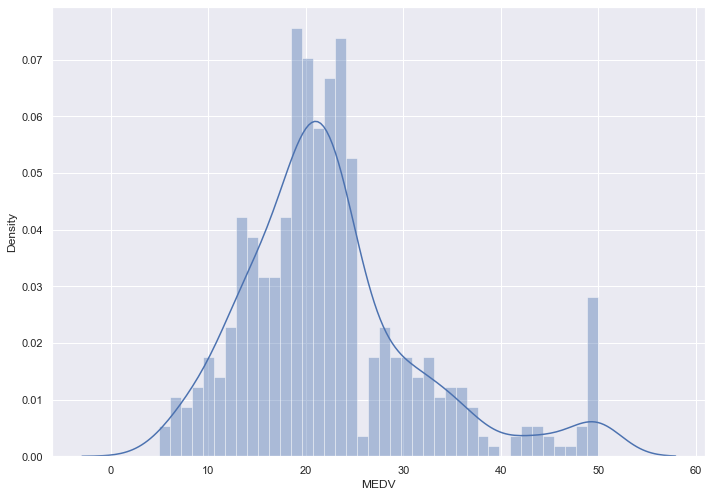

In [9]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(data['MEDV'], bins=40)
plt.show()

<AxesSubplot:>

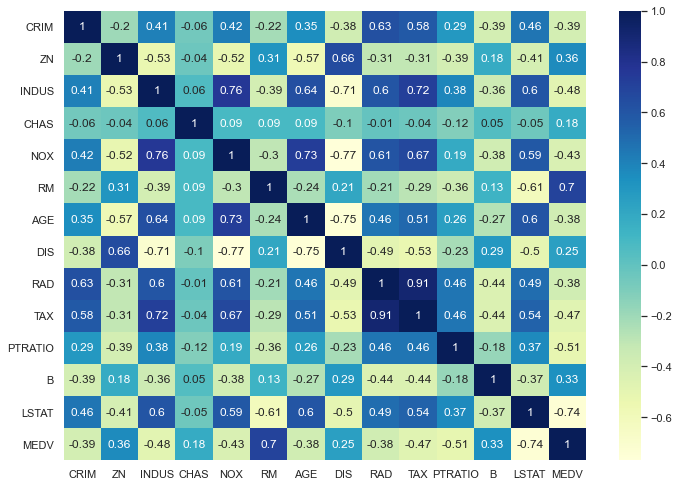

In [10]:
# compute the pair wise correlation for all columns  
correlation_matrix = data.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap = "YlGnBu", annot = True)

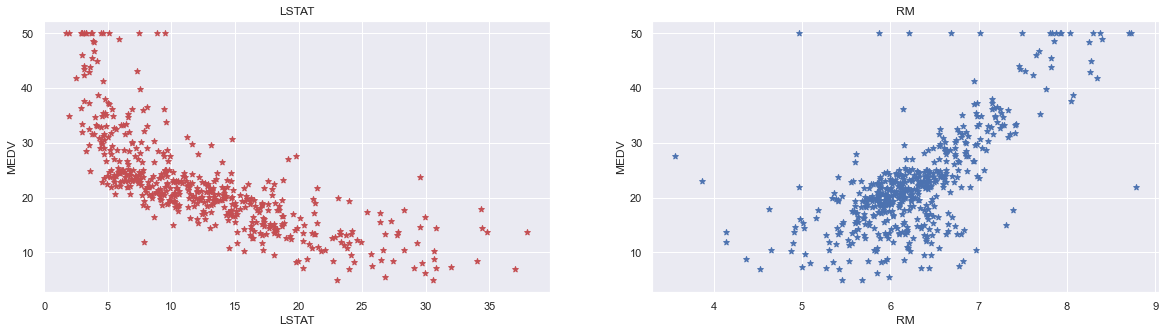

In [11]:
import itertools
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = data['MEDV']

colors = itertools.cycle(["r", "b", "g"])

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='*',color=next(colors))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [12]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['MEDV']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=15)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(303, 2)
(203, 2)
(303,)
(203,)


In [19]:
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [20]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.458629263661558
R2 score is 0.6484687217133125


The model performance for testing set
--------------------------------------
RMSE is 5.621245214851722
R2 score is 0.6229335046895609


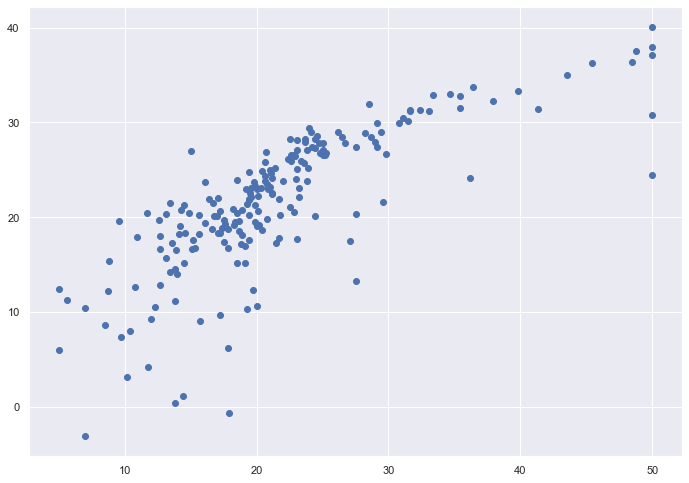

In [40]:
plt.scatter(Y_test, y_test_predict)
plt.show()

In [70]:
print(y_test_predict)

[ 2.64536871e+01  2.98641304e+01  2.73559492e+01  3.00740416e+01
  1.72565930e+01  2.09569797e+01  3.56067534e+01  1.53587511e+01
  1.97906981e+01  3.76879591e+01  2.06260068e+01  2.72408077e+01
  2.36019378e+01  3.14279645e+01  3.05443212e+01  3.78772893e+01
  2.78563562e+01  1.78927517e+01  2.25273381e+01  1.99963305e+01
  3.09037284e+01  1.94719479e+01  2.35694562e+01  2.71240387e+01
  3.32319836e+01  2.19111885e+01  1.77210722e+01  2.02275841e+01
  3.56466015e+01 -1.27964203e-02  2.92828695e+01  3.09817650e+01
  2.75158661e+01  2.52105418e+01  1.96846344e+01  1.88359496e+01
  7.20624915e+00  3.26422781e+01  2.56415172e+01  2.57772550e+01
  3.53004519e+01  2.72913124e+01  1.82426515e+01  2.92183123e+01
  1.71780040e+01  2.79702787e+01  2.12280857e+01  2.17817114e+01
  3.61177514e+01  1.81645200e+01  2.06868376e+01  1.88324420e+01
  2.13609435e+01  3.62358816e+01  2.89304691e+01  2.91878265e+01
  1.88031180e+01  2.14285216e+01  1.53456916e+01  2.73833917e+01
  2.28298056e+01  2.21630